<h1>Author : Ghuncha Fatma</h1>
<h2>Task 2 : Prediction using Decision Tree Algorithm</h2>
<h3>GRIP @ The Sparks Foundation</h3>
In this task, I created a Decision Tree classifier and visualized it graphically for the Iris dataset. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
species = {'Iris-setosa': 0,'Iris-versicolor':1,'Iris-virginica':2}

In [5]:
data['Species'] = data['Species'].map(species)

In [6]:
data['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [7]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [8]:
X = data.iloc[:, 1:5].values
y = data.iloc[:, 5].values

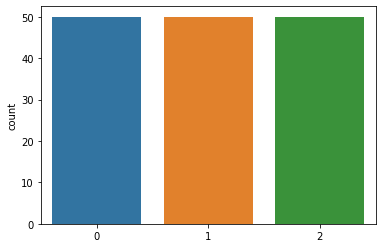

In [12]:
sns.countplot(y)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:

model = DecisionTreeClassifier()
model.fit(X_train ,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [17]:
from sklearn import metrics

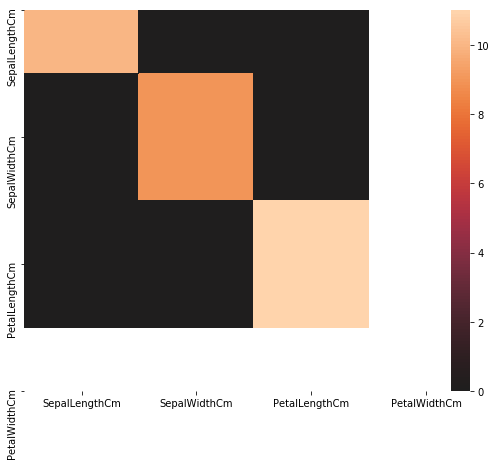

In [21]:
plt.figure(figsize = (9,7))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), xticklabels = data.iloc[:, 1:5].columns.values,  yticklabels = data.iloc[:, 1:5].columns.values, center = 0)
plt.show()

In [18]:
print(f"Precision: {metrics.precision_score(y_test, y_pred, average = 'macro')}")
print(f"Recall: {metrics.recall_score(y_test, y_pred, average = 'macro')}")
print(f"F1 Score: {metrics.f1_score(y_test, y_pred, average = 'macro')}")

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [19]:
from sklearn import tree

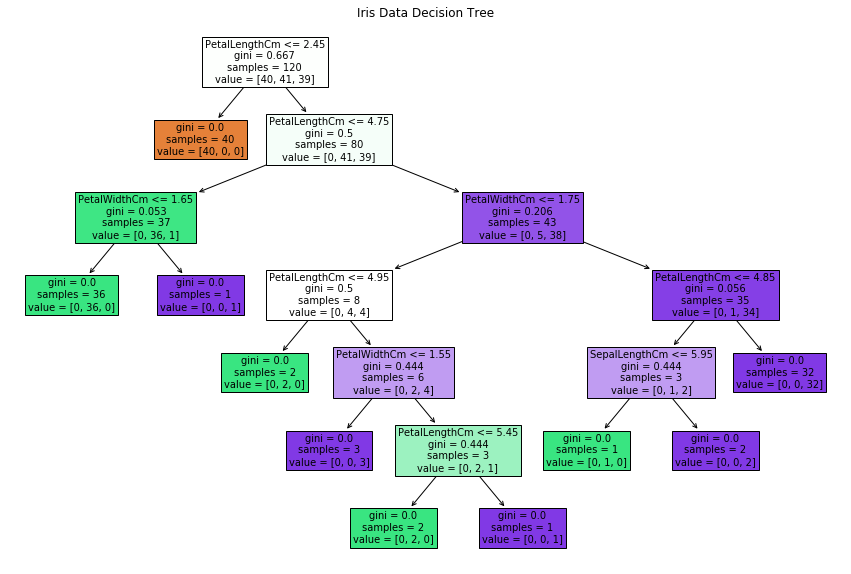

In [20]:
plt.figure(figsize = (15,10))
tree.plot_tree(model,
               feature_names = data.iloc[:, 1:5].columns.values,
               filled = True);
plt.title("Iris Data Decision Tree")
plt.show()